In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
df.columns = df.columns.str.replace(' ', '_')

In [4]:
df['Date']= pd.to_datetime(df['Date'])

In [5]:
df_melt = pd.melt(df, id_vars= ['Date'],value_vars=['Open', 'High', 'Low', 'Close', 'Adj_Close'],
    var_name= 'Stock',value_name='Stock_Price')
df_melt.head()

,Date,Stock,Stock_Price
0,2018-02-05,Open,262.000000
1,2018-02-06,Open,247.699997
2,2018-02-07,Open,266.579987
3,2018-02-08,Open,267.079987
4,2018-02-09,Open,253.850006


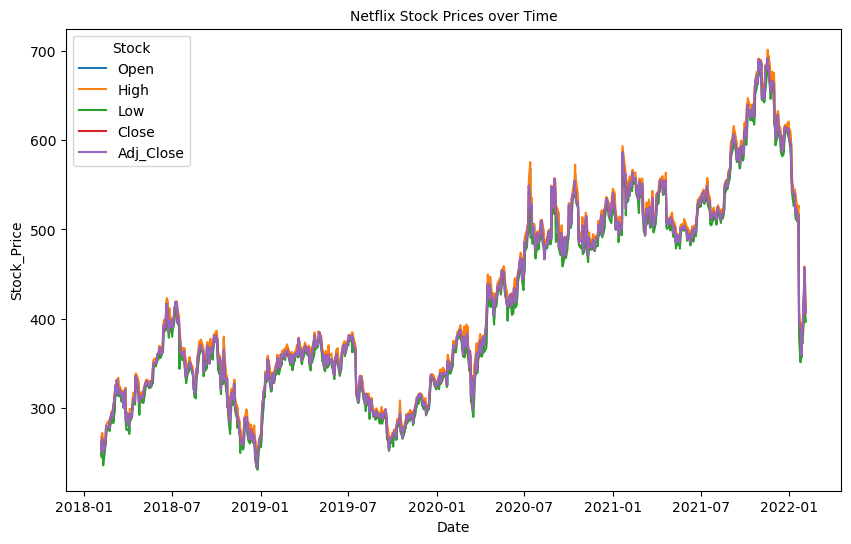

In [6]:
plt.figure(figsize = (10,6))
sns.lineplot(data = df_melt , x = 'Date', y = 'Stock_Price', hue = 'Stock')
plt.title('Netflix Stock Prices over Time',fontsize=10)
plt.show()

In [7]:
df = df.set_index(['Date'])

In [8]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

In [15]:
ts = df['Volume']
ts.head()

Date
2018-02-05    11896100
2018-02-06    12595800
2018-02-07     8981500
2018-02-08     9306700
2018-02-09    16906900
Name: Volume, dtype: int64

In [16]:
from datetime import datetime

In [19]:
ts[datetime(2018,2,8)]

9306700

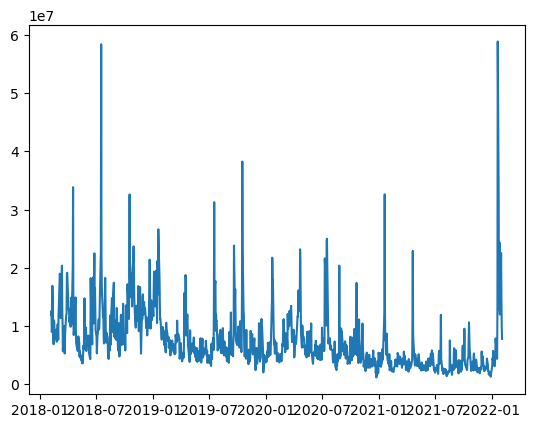

In [20]:
plt.plot(ts)